# DATA 601 Midterm Project
# Severe Thunderstorm Climatology vs Sunspot Number 
## Python weather analysis application that compares the occurrence of severe thunderstorm activity occurring over the continental Unites States to daily international sunspot number measurements.

### Overview: December 2019 was confirmed as the starting point of the new solar activity cycle.

### Abstract:
The reference date and amplitudes of the minima and maxima of the 11-year solar cycle are established based on the sunspot number maintained and distributed by the SILSO World Datacenter since 1981 at the Royal Observatory of Belgium. Sunspots are dark areas that become apparent at the Sun’s photosphere due to intense upward-forced magnetic flux from further within the solar interior. Heating areas along the magnetic flux in the upper photosphere and chromosphere become visible as faculae, causing cooler (7000 F), less dense, and darker areas at the core of these magnetic fields than in the surrounding photosphere (10,000 F). The resulting visible phenomenon is thus seen as sunspots. Active regions associated with sunspot groups are usually visible as bright enhancements in the corona at EUV and X-ray wavelengths. Recent studies of the potential impact of sunspot activity on global weather and climate patterns have identified relationships between sunspot number and, collectively, south Asian Monsoon rainfall patterns (Rao 1976) and thunderstorm activity over central Europe (Schlegel et al. 2001). 


<img src= "images/Fig1.png"> 

### Figure 1. Graphical description of sunspots and associated faculae.

## References:
Clette, F., Svalgaard, L., Vaquero, J.M. et al. Revisiting the Sunspot Number. Space Sci Rev 186, 35–103 (2014). https://doi.org/10.1007/s11214-014-0074-2

King, J. R., M. D. Parker, K. D. Sherburn, and G. M. Lackmann, 2017: Rapid Evolution of Cool Season, Low-CAPE Severe Thunderstorm Environments. Wea. Forecasting, 32, 763–779, https://doi.org/10.1175/WAF-D-16-0141.1.

Rao, Y. P., [Southwest Monsoon], India Meteorological Department, New Delhi, 2-5 (1976).

Schlegel, K., Diendorfer, G., Thern, S., & Schmidt, M. (2001). Thunderstorms, lightning and solar activity—Middle Europe. Journal of Atmospheric and Solar-Terrestrial Physics, 63(16), 1705-1713.

“The New Solar Activity Cycle.” Sunspot Index and Long-Term Solar Observations, Royal Observatory of Belgium, Brussels, 15 Sept. 2020, sidc.be/silso/node/167/#NewSolarActivity. 

In [1]:
#Load modules and invoke OpenWeather API
from __future__ import print_function, division
import numpy as np
import pandas as pd 
import sys
import requests
import xmltodict

#Invoke requests to call the WxData Storm Reports API Builder
#See https://wxdata.com/storm-reports-api-format#event
nov2019_1 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2019-11-01T00:00:00&enddate=2019-11-16T00:00:00&event=tstm+wnd+gst"
nov2019_2 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2019-11-16T00:00:00&enddate=2019-12-01T00:00:00&event=tstm+wnd+gst"
dec2019_1 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2019-12-01T00:00:00&enddate=2019-12-16T00:00:00&event=tstm+wnd+gst"
dec2019_2 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2019-12-16T00:00:00&enddate=2020-01-01T00:00:00&event=tstm+wnd+gst"
jan2020_1 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2020-01-01T00:00:00&enddate=2020-01-16T00:00:00&event=tstm+wnd+gst"
jan2020_2 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2020-01-16T00:00:00&enddate=2020-02-01T00:00:00&event=marine+tstm+wind"
feb2020_1 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2020-02-01T00:00:00&enddate=2020-02-15T00:00:00&event=tstm+wnd+gst"
feb2020_2 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2020-02-15T00:00:00&enddate=2020-03-01T00:00:00&event=tstm+wnd+gst"
mar2020_1 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2020-03-01T00:00:00&enddate=2020-03-16T00:00:00&event=tstm+wnd+gst"
mar2020_2 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2020-03-16T00:00:00&enddate=2020-04-01T00:00:00&event=tstm+wnd+gst"
apr2020_1 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2020-04-01T00:00:00&enddate=2020-04-16T00:00:00&event=tstm+wnd+gst"
apr2020_2 = "https://wxdata.com/cgi-bin/storm-report-api.pl?version=1.0&format=xml&key=2sGNfZOvAT6BSCY&secret=U6St4Q5fNO1enc8&date=2020-04-16T00:00:00&enddate=2020-04-30T23:00:00&event=tstm+wnd+gst"



In [2]:
#Function that builds a storm report listing for each half-month
def dataframe_strmrpt(sr_month):
    responsewx = requests.get(sr_month)
    wxdata_sr = responsewx.content
    xmlDict = xmltodict.parse(wxdata_sr)

    id = []
    mag = []
    state = []
    date = []
    
    if xmlDict['response']['data'].get('storm-report')!=None: 
        print("The key 'storm-report' is present.\n") 
    
        for stormreports in xmlDict['response']['data']['storm-report']:
            id.append(stormreports['id'])
            mag.append(stormreports['magnitude'])
            state.append(stormreports['state'])
            date.append(stormreports['event_local_time'])

        # Reversing a list using reverse() 
        def Reverse(lst): 
            lst.reverse() 
            return lst 

        sr_id = pd.Series(Reverse(id))
        sr_date = pd.Series(Reverse(date))
        sr_state = pd.Series(Reverse(state))
        sr_mag = pd.Series(Reverse(mag))
    
        wxdata_df = pd.DataFrame({'ID':sr_id,'Date':sr_date,'State':sr_state,'Magnitude':sr_mag})
        wxdata_df['Magnitude'] = wxdata_df['Magnitude'].str.replace(r'\M', '')
        wxdata_df['Magnitude'] = wxdata_df['Magnitude'].str.replace(r'\E', '')
        wxdata_df['Magnitude'] = wxdata_df['Magnitude'].str.replace(r'\PH', '')
        wxdata_df['Magnitude'] = wxdata_df['Magnitude'].str.replace(r'\.00', '')
        wxdata_df['Magnitude'] = wxdata_df['Magnitude'].astype(int)
        maxmag = np.amax(wxdata_df['Magnitude'])
        strmrpt_nr = len(wxdata_df.Magnitude)
    
    else: 
        print("The key 'storm-report' does not exist in the dictionary.") 
        wxdata_df = 'None'
        strmrpt_nr = 0
        maxmag = 0
    return wxdata_df, maxmag, strmrpt_nr

In [3]:
df_wxdata_nov2019e, maxmag_nov2019e, strmrpt_nr_nov2019e = dataframe_strmrpt(nov2019_1)
print("November 1-15 storm reports:")
print(df_wxdata_nov2019e)
print("Maximum wind magnitude: ", maxmag_nov2019e)
print("Number of storm reports: ", strmrpt_nr_nov2019e)
totsunspot_nr_nov2019e = 14
meansunspot_nr_nov2019e = totsunspot_nr_nov2019e/15
print("Sunspot number: ", totsunspot_nr_nov2019e)
print("Mean Sunspot number: ", meansunspot_nr_nov2019e)
print("")

df_wxdata_nov2019l, maxmag_nov2019l, strmrpt_nr_nov2019l = dataframe_strmrpt(nov2019_2)
print("November 16-30 storm reports:")
print(df_wxdata_nov2019l)
print("Maximum wind magnitude: ", maxmag_nov2019l)
print("Number of storm reports: ", strmrpt_nr_nov2019l)
totsunspot_nr_nov2019l = 0
meansunspot_nr_nov2019l = 0
print("Sunspot number: ", totsunspot_nr_nov2019l)
print("Mean Sunspot number: ", meansunspot_nr_nov2019l)
print("")

df_wxdata_dec2019e, maxmag_dec2019e, strmrpt_nr_dec2019e = dataframe_strmrpt(dec2019_1)
print("December 1-15 storm reports:")
print(df_wxdata_dec2019e)
print("Maximum wind magnitude: ", maxmag_dec2019e)
print("Number of storm reports: ", strmrpt_nr_dec2019e)
totsunspot_nr_dec2019e = 0
meansunspot_nr_dec2019e = 0
print("Sunspot number: ", totsunspot_nr_dec2019e)
print("Mean Sunspot number: ", meansunspot_nr_dec2019e)
print("")

df_wxdata_dec2019l, maxmag_dec2019l, strmrpt_nr_dec2019l = dataframe_strmrpt(dec2019_2)
print("December 16-31 storm reports:")
print(df_wxdata_dec2019l)
print("Maximum wind magnitude: ", maxmag_dec2019l)
print("Number of storm reports: ", strmrpt_nr_dec2019l)
totsunspot_nr_dec2019l = 47
meansunspot_nr_dec2019l = totsunspot_nr_dec2019l/16
print("Sunspot number: ", totsunspot_nr_dec2019l)
print("Mean Sunspot number: ", meansunspot_nr_dec2019l)
print("")

The key 'storm-report' is present.

November 1-15 storm reports:
                   Date      ID  Magnitude State
0   2019-11-01 01:13:00  812676         67    NJ
1   2019-11-01 01:18:00  812761         65    NJ
2   2019-11-01 01:21:00  812669         56    NY
3   2019-11-01 01:53:00  812612         53    NY
4   2019-11-01 12:02:00  812588         59    DE
5   2019-11-01 12:40:00  812914         76    VA
6   2019-11-01 12:41:00  812915         59    VA
7   2019-11-01 12:45:00  812607         57    NJ
8   2019-11-01 12:54:00  812856         60    NY
9   2019-11-04 21:47:00  813680         43    FL
10  2019-11-04 22:30:00  813681         51    FL
11  2019-11-04 22:40:00  813682         47    FL
12  2019-11-09 01:01:00  814384         42    FL
13  2019-11-09 01:50:00  814385         39    FL
14  2019-11-09 01:50:00  814399         39    FL
15  2019-11-09 02:10:00  814386         40    FL
16  2019-11-09 02:10:00  814400         40    FL
17  2019-11-09 02:25:00  814387         43    FL
18  

In [4]:
df_wxdata_jan2020e, maxmag_jan2020e, strmrpt_nr_jan2020e = dataframe_strmrpt(jan2020_1)
print("January 1-15 storm reports:")
print(df_wxdata_jan2020e)
print("Maximum wind magnitude: ", maxmag_jan2020e)
print("Number of storm reports: ", strmrpt_nr_jan2020e)
totsunspot_nr_jan2020e = 91
meansunspot_nr_jan2020e = totsunspot_nr_jan2020e/15
print("Sunspot number: ", totsunspot_nr_jan2020e)
print("Mean Sunspot number: ", meansunspot_nr_jan2020e)
print("")

df_wxdata_jan2020l, maxmag_jan2020l, strmrpt_nr_jan2020l = dataframe_strmrpt(jan2020_2)
print("January 16-31 storm reports:")
print(df_wxdata_jan2020l)
print("Maximum wind magnitude: ", maxmag_jan2020l)
print("Number of storm reports: ", strmrpt_nr_jan2020l)
totsunspot_nr_jan2020l = 101
meansunspot_nr_jan2020l = totsunspot_nr_jan2020l/16
print("Sunspot number: ", totsunspot_nr_jan2020l)
print("Mean Sunspot number: ", meansunspot_nr_jan2020l)
print("")

df_wxdata_feb2020e, maxmag_feb2020e, strmrpt_nr_feb2020e = dataframe_strmrpt(feb2020_1)
print("February 1-14 storm reports:")
print(df_wxdata_feb2020e)
print("Maximum wind magnitude: ", maxmag_feb2020e)
print("Number of storm reports: ", strmrpt_nr_feb2020e)
totsunspot_nr_feb2020e = 6
meansunspot_nr_feb2020e = totsunspot_nr_feb2020e/14
print("Sunspot number: ", totsunspot_nr_feb2020e)
print("Mean Sunspot number: ", meansunspot_nr_feb2020e)
print("")

df_wxdata_feb2020l, maxmag_feb2020l, strmrpt_nr_feb2020l = dataframe_strmrpt(feb2020_2)
print("February 15-29 storm reports:")
print(df_wxdata_feb2020l)
print("Maximum wind magnitude: ", maxmag_feb2020l)
print("Number of storm reports: ", strmrpt_nr_feb2020l)
totsunspot_nr_feb2020l = 0
meansunspot_nr_feb2020l = totsunspot_nr_feb2020l/15
print("Sunspot number: ", totsunspot_nr_feb2020l)
print("Mean Sunspot number: ", meansunspot_nr_jan2020l)
print("")

The key 'storm-report' is present.

January 1-15 storm reports:
                   Date      ID  Magnitude State
0   2020-01-04 12:55:00  839001         39    FL
1   2020-01-04 13:22:00  839013         42    FL
2   2020-01-04 13:30:00  839012         39    FL
3   2020-01-04 14:18:00  839016         41    FL
4   2020-01-04 14:34:00  839020         44    FL
5   2020-01-04 15:12:00  839173         43    XX
6   2020-01-04 16:15:00  839170         39    FL
7   2020-01-04 18:13:00  839243         40    FL
8   2020-01-10 17:43:00  841130         60    TX
9   2020-01-10 19:38:00  841196         66    TX
10  2020-01-10 19:48:00  842416         77    TX
11  2020-01-10 19:56:00  841203         59    TX
12  2020-01-10 20:19:00  841307         61    TX
13  2020-01-10 21:30:00  841211         60    TX
14  2020-01-11 01:41:00  841359         59    TX
15  2020-01-11 01:41:00  844249         59    TX
16  2020-01-11 02:01:00  841377         70    IL
17  2020-01-11 02:22:00  841374         69    TX
18  2

In [7]:
df_wxdata_mar2020e, maxmag_mar2020e, strmrpt_nr_mar2020e = dataframe_strmrpt(mar2020_1)
print("March 1-15 storm reports:")
print(df_wxdata_mar2020e)
print("Maximum wind magnitude: ", maxmag_mar2020e)
print("Number of storm reports: ", strmrpt_nr_mar2020e)
totsunspot_nr_mar2020e = 29
meansunspot_nr_mar2020e = totsunspot_nr_mar2020e/15
print("Sunspot number: ", totsunspot_nr_mar2020e)
print("Mean Sunspot number: ", meansunspot_nr_mar2020e)
print("")

df_wxdata_mar2020l, maxmag_mar2020l, strmrpt_nr_mar2020l = dataframe_strmrpt(mar2020_2)
print("March 16-31 storm reports:")
print(df_wxdata_mar2020l)
print("Maximum wind magnitude: ", maxmag_mar2020l)
print("Number of storm reports: ", strmrpt_nr_mar2020l)
totsunspot_nr_mar2020l = 17
meansunspot_nr_mar2020l = totsunspot_nr_mar2020l/16
print("Sunspot number: ", totsunspot_nr_mar2020l)
print("Mean Sunspot number: ", meansunspot_nr_mar2020l)
print("")

df_wxdata_apr2020e, maxmag_apr2020e, strmrpt_nr_apr2020e = dataframe_strmrpt(apr2020_1)
print("April 1-15 storm reports:")
print(df_wxdata_apr2020e)
print("Maximum wind magnitude: ", maxmag_apr2020e)
print("Number of storm reports: ", strmrpt_nr_apr2020e)
totsunspot_nr_apr2020e = 52
meansunspot_nr_apr2020e = totsunspot_nr_apr2020e/15
print("Sunspot number: ", totsunspot_nr_apr2020e)
print("Mean Sunspot number: ", meansunspot_nr_apr2020e)
print("")

df_wxdata_apr2020l, maxmag_apr2020l, strmrpt_nr_apr2020l = dataframe_strmrpt(apr2020_2)
print("April 16-30 storm reports:")
print(df_wxdata_apr2020l)
print("Maximum wind magnitude: ", maxmag_apr2020l)
print("Number of storm reports: ", strmrpt_nr_apr2020l)
totsunspot_nr_apr2020l = 104
meansunspot_nr_apr2020l = totsunspot_nr_apr2020l/15
print("Sunspot number: ", totsunspot_nr_apr2020l)
print("Mean Sunspot number: ", meansunspot_nr_apr2020l)

The key 'storm-report' is present.

March 1-15 storm reports:
                   Date      ID  Magnitude State
0   2020-03-03 01:19:00  866047         60    TN
1   2020-03-03 01:19:00  867446         60    TN
2   2020-03-03 17:37:00  866310         53    OH
3   2020-03-03 18:22:00  866312         45    OH
4   2020-03-03 18:40:00  866323         46    OH
5   2020-03-03 18:46:00  866325         52    OH
6   2020-03-03 19:53:00  866338         52    OH
7   2020-03-03 20:31:00  866341         54    PA
8   2020-03-03 20:55:00  866512         60    PA
9   2020-03-03 21:05:00  866490         53    PA
10  2020-03-03 21:22:00  866514         60    PA
11  2020-03-03 21:30:00  866516         62    PA
12  2020-03-03 21:31:00  866352         55    DE
13  2020-03-03 21:35:00  866500         51    NJ
14  2020-03-03 21:35:00  866517         50    NJ
15  2020-03-03 21:45:00  866501         48    NJ
16  2020-03-03 21:45:00  866502         56    NJ
17  2020-03-03 21:55:00  866438         60    MD
18  202

The key 'storm-report' is present.

April 16-30 storm reports:
                    Date      ID  Magnitude State
0    2020-04-18 11:06:00  883680         44    FL
1    2020-04-18 11:19:00  883679         44    FL
2    2020-04-18 13:06:00  883499         41    FL
3    2020-04-18 13:06:00  883585         41    FL
4    2020-04-18 13:21:00  883586         43    FL
5    2020-04-18 13:39:00  883487         41    FL
6    2020-04-18 13:39:00  883587         41    FL
7    2020-04-18 14:31:00  883588         42    FL
8    2020-04-18 14:44:00  883494         45    FL
9    2020-04-18 15:12:00  883497         39    FL
10   2020-04-18 18:23:00  883557         60    KS
11   2020-04-19 07:05:00  883608         56    AL
12   2020-04-19 12:50:00  883645         47    SC
13   2020-04-19 13:00:00  883654         49    SC
14   2020-04-19 13:08:00  883651         49    SC
15   2020-04-19 16:37:00  883736         63    TX
16   2020-04-19 17:02:00  883711         54    MS
17   2020-04-19 19:11:00  883737     

Model slope:     1.4101700450187769
Model intercept: 38.075967437195324
Mean squared error: 8559.87
Coefficient of determination: 0.36
Correlation Coefficient =  0.5984005569449357


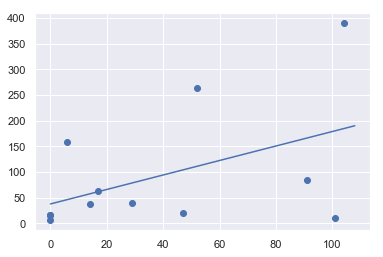

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

y = np.array([strmrpt_nr_nov2019e, strmrpt_nr_nov2019l, strmrpt_nr_dec2019e, strmrpt_nr_dec2019l, strmrpt_nr_jan2020e,
             strmrpt_nr_jan2020l, strmrpt_nr_feb2020e, strmrpt_nr_feb2020l, strmrpt_nr_mar2020e, strmrpt_nr_mar2020l,
             strmrpt_nr_apr2020e, strmrpt_nr_apr2020l])
x = np.array([totsunspot_nr_nov2019e, totsunspot_nr_nov2019l, totsunspot_nr_dec2019e, totsunspot_nr_dec2019l,
             totsunspot_nr_jan2020e, totsunspot_nr_jan2020l, totsunspot_nr_feb2020e, totsunspot_nr_feb2020l,
             totsunspot_nr_mar2020e, totsunspot_nr_mar2020l, totsunspot_nr_apr2020e, totsunspot_nr_apr2020l])

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 108, 12)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y,yfit))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(y,yfit))

R = np.sqrt(r2_score(y,yfit))
print("Correlation Coefficient = ", R)


Model slope:     22.80867151737222
Model intercept: 35.086898392101624
Mean squared error: 8480.56
Coefficient of determination: 0.36
Correlation Coefficient =  0.6033495294480762


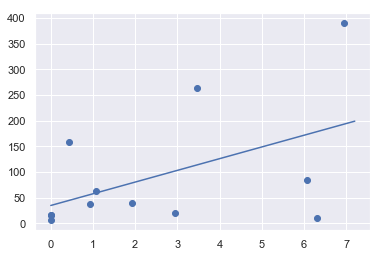

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

y = np.array([strmrpt_nr_nov2019e, strmrpt_nr_nov2019l, strmrpt_nr_dec2019e, strmrpt_nr_dec2019l, strmrpt_nr_jan2020e,
             strmrpt_nr_jan2020l, strmrpt_nr_feb2020e, strmrpt_nr_feb2020l, strmrpt_nr_mar2020e, strmrpt_nr_mar2020l,
             strmrpt_nr_apr2020e, strmrpt_nr_apr2020l])
x = np.array([meansunspot_nr_nov2019e, meansunspot_nr_nov2019l, meansunspot_nr_dec2019e, meansunspot_nr_dec2019l,
             meansunspot_nr_jan2020e, meansunspot_nr_jan2020l, meansunspot_nr_feb2020e, meansunspot_nr_feb2020l,
             meansunspot_nr_mar2020e, meansunspot_nr_mar2020l, meansunspot_nr_apr2020e, meansunspot_nr_apr2020l])

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 7.2, 12)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y,yfit))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f"
      % r2_score(y,yfit))

R = np.sqrt(r2_score(y,yfit))
print("Correlation Coefficient = ", R)


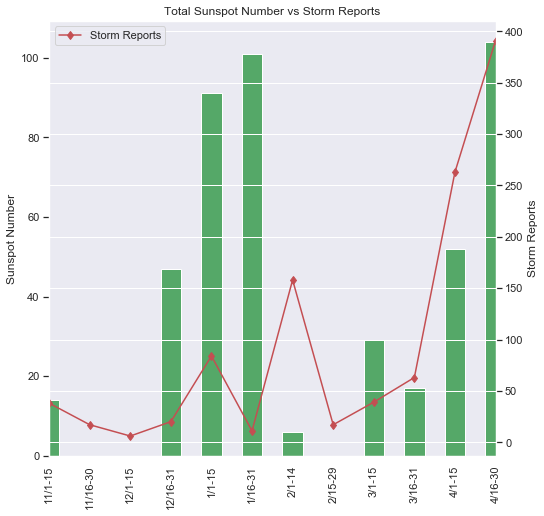

In [15]:
import pandas as pd 
#Plot sunspot number vs storm report number
tss = pd.Series([totsunspot_nr_nov2019e, totsunspot_nr_nov2019l, totsunspot_nr_dec2019e, totsunspot_nr_dec2019l,
             totsunspot_nr_jan2020e, totsunspot_nr_jan2020l, totsunspot_nr_feb2020e, totsunspot_nr_feb2020l,
             totsunspot_nr_mar2020e, totsunspot_nr_mar2020l, totsunspot_nr_apr2020e, totsunspot_nr_apr2020l])
mss = pd.Series([meansunspot_nr_nov2019e, meansunspot_nr_nov2019l, meansunspot_nr_dec2019e, meansunspot_nr_dec2019l,
             meansunspot_nr_jan2020e, meansunspot_nr_jan2020l, meansunspot_nr_feb2020e, meansunspot_nr_feb2020l,
             meansunspot_nr_mar2020e, meansunspot_nr_mar2020l, meansunspot_nr_apr2020e, meansunspot_nr_apr2020l])
sr = pd.Series([strmrpt_nr_nov2019e, strmrpt_nr_nov2019l, strmrpt_nr_dec2019e, strmrpt_nr_dec2019l, strmrpt_nr_jan2020e,
             strmrpt_nr_jan2020l, strmrpt_nr_feb2020e, strmrpt_nr_feb2020l, strmrpt_nr_mar2020e, strmrpt_nr_mar2020l,
             strmrpt_nr_apr2020e, strmrpt_nr_apr2020l])
month = pd.Series(['11/1-15','11/16-30','12/1-15','12/16-31','1/1-15','1/16-31','2/1-14','2/15-29','3/1-15','3/16-31',
                  '4/1-15','4/16-30'])

fig = plt.figure(figsize=(8, 8))
ax1 = tss.plot(kind='bar', color='g', label='Sunspot Number')
ax2 = sr.plot(kind='line', color='r', marker='d', secondary_y=True, label='Storm Reports')
plt.title('Total Sunspot Number vs Storm Reports')
plt.xlabel("Month")
plt.xticks(np.arange(12))
ax1.set_xticklabels(month, rotation = 90)
ax1.set_ylabel('Sunspot Number')
ax2.set_ylabel('Storm Reports')
plt.legend(loc='upper left')
plt.savefig("Sunspots_StormReports.png",dpi=250,bbox_inches='tight')
plt.show()

<img src= "images/table2_schlegel.png"> 
### Figure 2. Table 2 from Schlegel et al. (2001).

## Discussion/Summary:
Thunderstorm wind reports over CONUS were obtained via WxData API (https://wxdata.com/api-storm-reports-explorer) and corresponding daily sunspot number values were obtained from the Sunspot Index and Long-term Solar Observations (SILSO) website (http://sidc.be/silso/datafiles). The total number of wind reports were calculated for each semi-monthly period between November 2019 and April 2020 and compared to sum of daily sunspot number values for each semi-monthly period. For the study period (November 2019 - April 2020), coefficient of determination and correlation coefficient were calculated for a dataset of of 12 wind report and sunspot number totals. The correlation coefficient of 0.6 between the thunderstorm wind report total and sunspot number total for each semi-monthly period is consistent with the results of Schlegel et al. (2001) that documented correlation coefficients of 0.53 and 0.65 between monthly lightning stroke (delta) number and sunspot number (R) over an entire solar cycle (1992-2000).
In summary, this study entailed a short-term analysis of thunderstorm reports and sunspot number measurements, binned into semi-monthly segments over the first six months of solar cycle 25 and during the cool season. The correlation of 0.6 for both semi-monthly total and mean sunspot numbers demonstrates a significant functional relationship between sunspot and cool-season thunderstorm activity over CONUS that can serve as a starting point for more detailed studies between solar cycles and the intensity of regional convective storm activity.